<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/5_Machine_Learning_Aprendizaje_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Aprendizaje Supervisado

Veamos un ejemplo que intenta identificar caracteres numéricos escritos a mano a partir de una imagen.

#Reconocimiento de dígitos con Machine Learning

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
#Load data set.
from sklearn import datasets
digits = datasets.load_digits()
X, y = digits.data, digits.target

print (X.shape)
print (y.shape)

(1797, 64)
(1797,)


Esto nos dice que tenemos 1797 ejemplos, cada uno compuesto por 64 dimensiones (imágenes de 8x8 pixels). Todos están etiquetados con su clase. Visualizemos un digito del dataset (por ejemplo el elemento 666). Como está en formato vector lo pasamos de nuevo a forma cuadrada. Usaremos para visualizarlo la librería Scikit image, que es una librería de Python especializada en tratamiento de imágenes.

In [2]:
print (X[666].reshape((8,8)))

[[ 0.  0.  5. 15. 14.  3.  0.  0.]
 [ 0.  0. 13. 15.  9. 15.  2.  0.]
 [ 0.  4. 16. 12.  0. 10.  6.  0.]
 [ 0.  8. 16.  9.  0.  8. 10.  0.]
 [ 0.  7. 15.  5.  0. 12. 11.  0.]
 [ 0.  7. 13.  0.  5. 16.  6.  0.]
 [ 0.  0. 16. 12. 15. 13.  1.  0.]
 [ 0.  0.  6. 16. 12.  2.  0.  0.]]


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


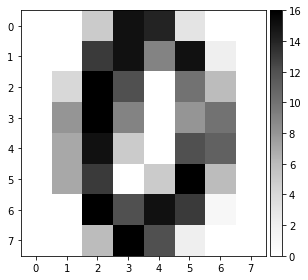

In [3]:
from skimage import io as io
io.imshow(X[666].reshape((8,8)),cmap=plt.cm.Greys)
io.show()

Vamos a visualizar unas cuantas imágenes de dígitos

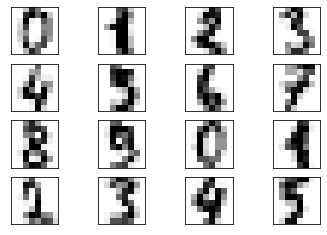

In [4]:
#Visualize some of the data.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8), cmap=plt.cm.Greys)


##Modelo KNN con Scikit-learn
Pongamos un ejemplo de uso de funciones prediciendo con KNN (K Nearest Neighbours o k vecinos más cercanos) que es un algoritmo de machine learning. Usando KNN, vamos a predecir la etiqueta de los 16 números que acabamos de mostrar.


In [5]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X,y) 
y_pred = knn.predict(X)
for i in range(16):
    print (y[i], ": ", y_pred[i])


0 :  0
1 :  1
2 :  2
3 :  3
4 :  4
5 :  9
6 :  6
7 :  7
8 :  8
9 :  9
0 :  0
1 :  1
2 :  2
3 :  3
4 :  4
5 :  5


Como vemos, falla en el ejemplo 5. 

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


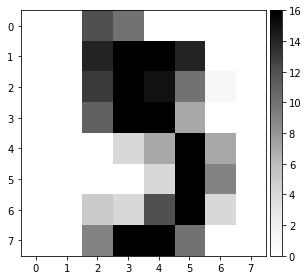

In [6]:
io.imshow(X[5].reshape((8,8)),cmap=plt.cm.Greys)
io.show()

In [7]:
fallos = [y != y_pred]

In [8]:
X[fallos].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


(17, 64)

In [9]:
print ("y_real", "y_pred")
for i in range(len(y[fallos])):
      print("  ",y[fallos][i],"    ", y_pred[fallos][i])

y_real y_pred
   5      9
   9      4
   8      1
   7      9
   9      8
   9      1
   8      1
   9      3
   8      6
   9      3
   9      8
   3      7
   5      6
   8      1
   3      7
   9      3
   9      5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


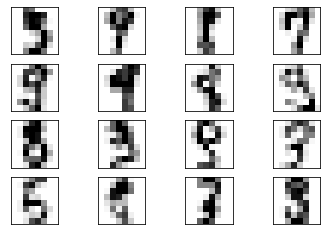

In [10]:
fig, ax = plt.subplots(4, 4, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(ax.size):
    ax.flat[i].imshow(X[fallos][i].reshape(8, 8), cmap=plt.cm.Greys)

Evaluemos de una manera sencilla que tal lo ha hecho KNN para todo el dataset de dígitos (aciertos / total). Esta forma de calcular la eficacia del algoritmo no es la más correcta (clases no balanceadas, tendencia al overfitting, etc.) pero de momento nos vale.

In [11]:
knn.score(X,y)

0.9905397885364496

##Cómo medir la eficacia del algoritmo
Veamos como obtener algunos de estos valores usando la clase metrics de sklearn. A la función classification_report le pasamos como primer argumento los valores reales, y como segundo argumento los valores predichos. La última columna del informe (support) nos dice el número de ejemplos que había en esa clase.


In [12]:
import pylab as plt
from sklearn import metrics

In [13]:
print ("Ratio de aciertos:", metrics.accuracy_score(y, y_pred))
print(metrics.classification_report(y,y_pred))

Ratio de aciertos: 0.9905397885364496
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.98      1.00      0.99       182
           2       1.00      1.00      1.00       177
           3       0.98      0.99      0.99       183
           4       0.99      1.00      1.00       181
           5       0.99      0.99      0.99       182
           6       0.99      1.00      0.99       181
           7       0.99      0.99      0.99       179
           8       0.99      0.98      0.98       174
           9       0.99      0.96      0.97       180

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797



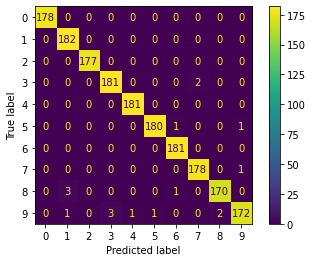

In [14]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y, y_pred))
disp.plot()
plt.show()

Hasta ahora hemos medido la clasificación sobre datos con los que había sido entrenado. Vamos ahora a simular un caso real, diviendo el dataset en dos partes, una la usaremos sólo para entrenar (datos de entrenamiento) y otra parte la usaremos sólo para evaluar que tal hemos ajustado los datos (datos de test o de evaluación). Llamando a numpy.random.permutation y dando como argumento un número, esta función randomiza los índices entre cero y el número que le hayamos pasado. Definimos también un parámetro (splitting) que determina que porcentaje de datos se usan para entrenamiento (el resto para evaluación).

In [15]:
import numpy as np

digits = datasets.load_digits()
X, y = digits.data, digits.target

perm = np.random.permutation(y.size)

splitting = 0.7
split_point = int(np.ceil(y.shape[0]*splitting))

X_train = X[perm[:split_point].ravel(),:]
y_train = y[perm[:split_point].ravel()]

X_test = X[perm[split_point:].ravel(),:]
y_test = y[perm[split_point:].ravel()]


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1258, 64)
(1258,)
(539, 64)
(539,)


Existe una función que realiza esta selección aleatoria y división de los datos para obtener un conjunto de datos de entrenamiento y un conjunto de datos de test:  train_test_split

In [17]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Entrenamos el algoritmo KNN con el connjunto de datos de entrenamiento (X_train, y_train)

In [18]:
#Train a classifier on training data
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

La precisión que obtiene con los datos de entrenamiento es:

In [19]:
print(knn.score(X_train,y_train))

1.0


Lo podemos comprobar en el informe de precisión y en la matriz de confusión

In [20]:
y_pred = knn.predict(X_train)
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       122
           3       1.00      1.00      1.00       127
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00       129
           6       1.00      1.00      1.00       116
           7       1.00      1.00      1.00       123
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       131

    accuracy                           1.00      1258
   macro avg       1.00      1.00      1.00      1258
weighted avg       1.00      1.00      1.00      1258



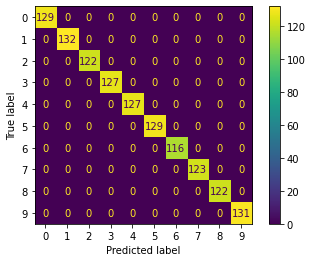

In [21]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, y_pred))
disp.plot()
plt.show()

Evaluamos la precisión de nuestro algoritmo en el conjunto de datos de test o validación

In [22]:
#Check on the test set and visualize performance
y_hat=knn.predict(X_test)
print ("Ratio de aciertos: ", metrics.accuracy_score(y_test, y_hat))

Ratio de aciertos:  0.9851576994434137


In [23]:
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.94      1.00      0.97        50
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       1.00      1.00      1.00        54
           5       1.00      0.96      0.98        53
           6       0.98      0.98      0.98        65
           7       1.00      0.98      0.99        56
           8       0.98      0.96      0.97        52
           9       0.96      0.96      0.96        49

    accuracy                           0.99       539
   macro avg       0.99      0.98      0.98       539
weighted avg       0.99      0.99      0.99       539



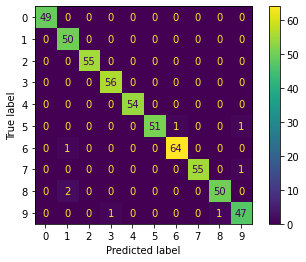

In [24]:
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_hat))
disp.plot()
plt.show()

Como vemos, el resultado es bueno, pero peor que cuando evaluábamos sobre los propios datos de entrenamiento. Aunque pueda parecer que ésto es algo malo, en realidad no lo es. El algoritmo ha sido capaz de generalizar usando los datos de entrenamiento y ha conseguido predecir bien datos que no habia visto nunca.

Como el corte para separar datos de entrenamiento y datos de evaluación es aleatorio, cada vez que ejecutemos el algoritmo el resultado será un poco distinto. Lo que podemos hacer es ejecutar diez veces el algoritmo sobre los datos, cortando cada vez por un sitio distinto. Después, hacemos la media de los scores.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
splitting = 0.7
acc=np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=splitting)
    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_hat=knn.predict(X_test)
    acc[i] = metrics.accuracy_score(y_test, y_hat)
    print (i,acc[i])
print ("Score medio: " + str(np.mean(acc[0])))


0 0.9851851851851852
1 0.9833333333333333
2 0.987037037037037
3 0.9962962962962963
4 0.9796296296296296
5 0.9907407407407407
6 0.9851851851851852
7 0.9740740740740741
8 0.9833333333333333
9 0.9907407407407407
Score medio: 0.9851851851851852


##Selección del mejor modelo
##Validación cruzada (Cross-Validation)
Usando el error en los datos desconocidos podemos seleccionar que modelo ajusta mejor nuestros datos. A esto se le llama validación cruzada (cross-validation).
Vamos a probar tres algoritmos (k nearest neighbours, support vector machine y árboles de decisión). Probaremos cada algoritmo 10 veces y mostraremos un diagrama de cajas con los resultados. Todos los algoritmos usaran los mismos datos para entrenar y para evaluar.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

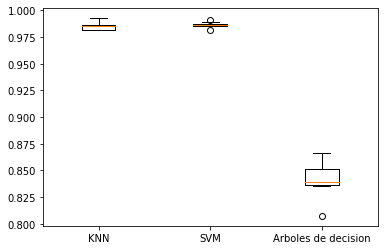

In [28]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

splitting = 0.7
acc_cr=np.zeros((10,3))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=splitting)
    knn = neighbors.KNeighborsClassifier()
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    knn.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    y_hat_knn=knn.predict(X_test)
    y_hat_svc=svc.predict(X_test)
    y_hat_dt=dt.predict(X_test)
    
    acc_cr[i][0] = metrics.accuracy_score(y_test, y_hat_knn)
    acc_cr[i][1] = metrics.accuracy_score(y_test, y_hat_svc)
    acc_cr[i][2] = metrics.accuracy_score(y_test, y_hat_dt)


plt.boxplot(acc_cr);

ax = plt.gca()
ax.set_xticklabels(['KNN','SVM','Arboles de decision'])
plt.show()

In [29]:
print('Precisión media')
print('KNN: ', acc_cr[:,0].mean())
print('SVM: ', acc_cr[:,1].mean())
print('Árboles de decisión: ', acc_cr[:,2].mean())

Precisión media
KNN:  0.985
SVM:  0.9862962962962964
Árboles de decisión:  0.8420370370370371


Como vemos, para este problema, el algoritmo que mejor funciona es SVM, ya que es el que tiene el score medio más alto de los algoritmos probados. Existen otras formas de seleccionar el mejor modelo.

##Validación cruzada de K iteraciones (K-fold cross validation)
En este caso los datos de entrenamiento se dividen en K trozos que no se superponen. Todos los trozos menos uno se usan para entrenamiento y el último para la evaluación. Este proceso se repite K veces, dejando para evaluación cada vez un trozo distinto. El score final es promediado.


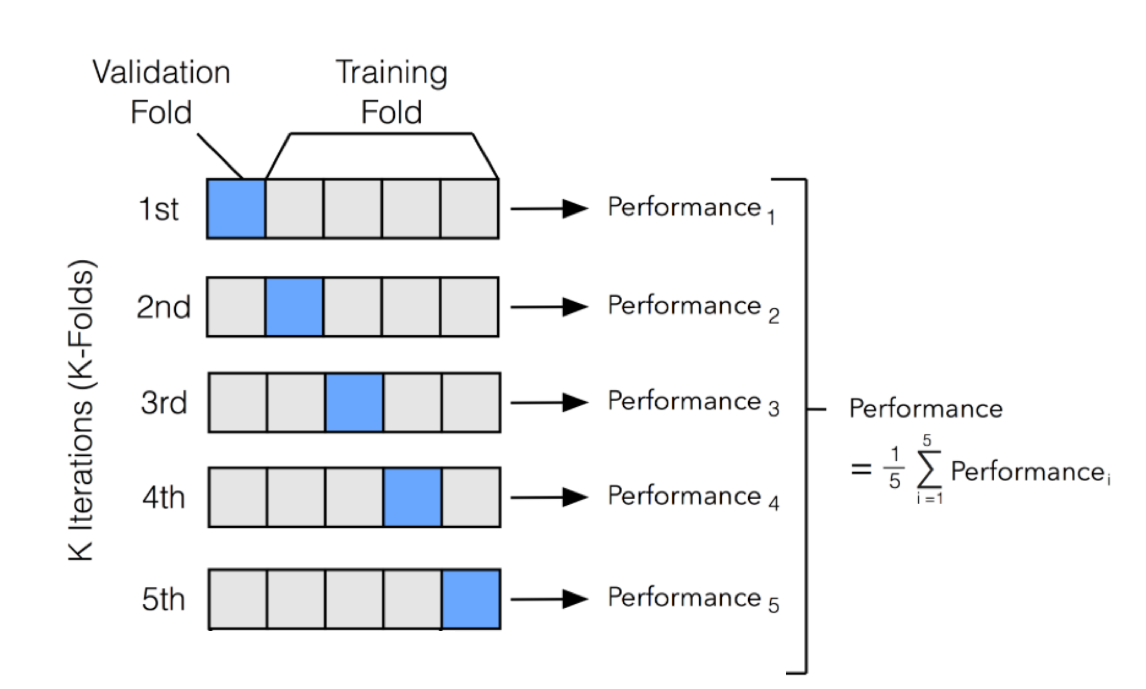

[Text(0, 0, 'KNN'), Text(0, 0, 'SVM'), Text(0, 0, 'Arboles de decision')]

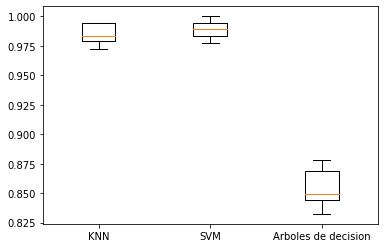

In [30]:
from sklearn.model_selection import KFold
acc_kf = np.zeros((10,3))
kf=KFold(n_splits=10, shuffle=True, random_state=0)
i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn = neighbors.KNeighborsClassifier()
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    knn.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    y_hat_knn=knn.predict(X_test)
    y_hat_svc=svc.predict(X_test)
    y_hat_dt=dt.predict(X_test)
    
    acc_kf[i][0] = metrics.accuracy_score(y_test, y_hat_knn)
    acc_kf[i][1] = metrics.accuracy_score(y_test, y_hat_svc)
    acc_kf[i][2] = metrics.accuracy_score(y_test, y_hat_dt)
    i=i+1
    

plt.boxplot(acc_kf);
ax = plt.gca()
ax.set_xticklabels(['KNN','SVM','Arboles de decision'])


In [31]:
print('Precisión media')
print('KNN: ', acc_kf[:,0].mean())
print('SVM: ', acc_kf[:,1].mean())
print('Árboles de decisión: ', acc_kf[:,2].mean())

Precisión media
KNN:  0.9849689633767846
SVM:  0.9888671632526382
Árboles de decisión:  0.8541961514587214


##Validación cruzada dejando uno fuera (Leave-one-out cross-validation)
En este caso, dados N datos para entrenar el modelo, éste se entrena con N-1 datos y se evalúa con el que queda. Este proceso se repite N veces usando cada vez un dato distinto para evaluar y promedio los resultados. Como este entrenamiento es más intensivo que los anterioes en cuanto a número de operaciones, vamos a usar una parte de los datos y no todos.


Ratio de aciertos: 
 KNN:  0.330550918196995 
 SVM:  0.3299944351697273 
 Arboles de decision:  0.2776850306065665


[Text(0, 0, 'KNN'), Text(0, 0, 'SVM'), Text(0, 0, 'Arboles de decision')]

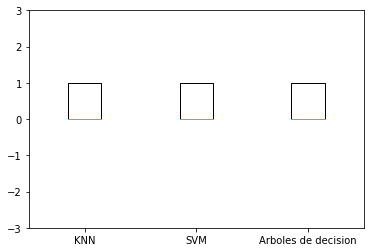

In [32]:
from sklearn.model_selection import LeaveOneOut
X_reduced=X[:600]
y_reduced=y[:600]
acc_loo = np.zeros((y.shape[0],3))
loo = LeaveOneOut()
i=0
for train_index, test_index in loo.split(X_reduced):
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]

    X_train, X_test = X_reduced[train_index], X_reduced[test_index]
    y_train, y_test = y_reduced[train_index], y_reduced[test_index]
    
    knn = neighbors.KNeighborsClassifier()
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    knn.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    y_hat_knn=knn.predict(X_test)
    y_hat_svc=svc.predict(X_test)
    y_hat_dt=dt.predict(X_test)
    
    acc_loo[i][0] = metrics.accuracy_score(y_test, y_hat_knn)
    acc_loo[i][1] = metrics.accuracy_score(y_test, y_hat_svc)
    acc_loo[i][2] = metrics.accuracy_score(y_test, y_hat_dt)
    i=i+1
    
    
print ("Ratio de aciertos: \n", \
"KNN: ", (sum(acc_loo)/acc_loo.shape[0])[0], "\n",\
"SVM: ", (sum(acc_loo)/acc_loo.shape[0])[1],  "\n",\
"Arboles de decision: ", (sum(acc_loo)/acc_loo.shape[0])[2]
)
plt.boxplot(acc_loo);
ax = plt.gca()
ax.set_ylim(-3, 3)
ax.set_xticklabels(['KNN','SVM','Arboles de decision'])


En este caso, hacer la gráfica tiene menos sentido, ya que en cada evaluación completa, solo se prueba con un dato, lo que nos dará un 1 o un 0 en función de si lo ha clasificado bien o no. Repetido este proceso N veces, obtienes una lista de unos y ceros, de los que solo se puede sacar la media y no intervalos de confianza. La única información que aporta la gráfica es indicarnos si la mediana es cero o uno (lo que cuál no es de gran ayuda). Por este motivo, para esta forma de entrenamiento, hemos calculado el ratio de aciertos, con el resultado de que KNN es el algoritmo que mejor funciona para este problema.